# Import and Prepare Data

In [1]:
import gdown
import pandas as pd

# download poem datasets
url = "https://drive.google.com/file/d/1EaKHbcCY-NRH0ioQXB3L34-eztATyUo4/view?usp=sharing"
output = "GPT4_poems_df.csv"
gdown.download(url=url, output=output, fuzzy=True)

url = "https://drive.google.com/file/d/1L0ivWIkVeoPCXF8KIcviMscuumwW2n9H/view?usp=sharing"
output = "GPT4o_mini_poems_df.csv"
gdown.download(url=url, output=output, fuzzy=True)

url = 'https://drive.google.com/file/d/1eCbSyyBwGf7N7I8qc8ysuRv27gXBjL2l/view?usp=sharing'
output = "claude_poems_df.csv"
gdown.download(url=url, output=output, fuzzy=True)

url = 'https://drive.google.com/file/d/1mRT5dSy_n5wL6h7nepwTj_k7ORBRBAeg/view?usp=sharing'
output = "OLMo_poems_df.csv"
gdown.download(url=url, output=output, fuzzy=True)

url = 'https://drive.google.com/file/d/1RnZfn9xQcj8kxCs13ZzsIlKHcMwxwMIB/view?usp=drive_link'
output = "original_brown_duplexes.csv"
gdown.download(url=url, output=output, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1EaKHbcCY-NRH0ioQXB3L34-eztATyUo4
To: /content/GPT4_poems_df.csv
100%|██████████| 177k/177k [00:00<00:00, 30.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1L0ivWIkVeoPCXF8KIcviMscuumwW2n9H
To: /content/GPT4o_mini_poems_df.csv
100%|██████████| 201k/201k [00:00<00:00, 14.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1eCbSyyBwGf7N7I8qc8ysuRv27gXBjL2l
To: /content/claude_poems_df.csv
100%|██████████| 182k/182k [00:00<00:00, 10.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1mRT5dSy_n5wL6h7nepwTj_k7ORBRBAeg
To: /content/OLMo_poems_df.csv
100%|██████████| 191k/191k [00:00<00:00, 11.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1RnZfn9xQcj8kxCs13ZzsIlKHcMwxwMIB
To: /content/original_brown_duplexes.csv
100%|██████████| 3.18k/3.18k [00:00<00:00, 10.8MB/s]


'original_brown_duplexes.csv'

In [3]:
# import csv files of poems as dataframes
gpt4_poems_df = pd.read_csv('/content/GPT4_poems_df.csv')
gpt4o_mini_poems_df = pd.read_csv('/content/GPT4o_mini_poems_df.csv')
claude_poems_df = pd.read_csv('/content/claude_poems_df.csv')
olmo_poems_df = pd.read_csv('/content/OLMo_poems_df.csv')
brown_duplexes_df = pd.read_csv('/content/original_brown_duplexes.csv')


# fill NaN values in 'poem_text' columns with empty strings to avoid errors
gpt4_poems_df['poem_text'] = gpt4_poems_df['poem_text'].fillna('')
gpt4o_mini_poems_df['poem_text'] = gpt4o_mini_poems_df['poem_text'].fillna('')
claude_poems_df['poem_text'] = claude_poems_df['poem_text'].fillna('')
olmo_poems_df['poem_text'] = olmo_poems_df['poem_text'].fillna('')
brown_duplexes_df['poem_text'] = brown_duplexes_df['poem_text'].fillna('')

gpt4_poems_df

,subject,with_brown_rules,prompt_type,poem_text
0,abuse,True,general,The bruise blooms dark where no eye dares to w...
1,abuse,True,figurative,The silence thickens where the shouting fades—...
2,abuse,True,specific,"The mirror shattered, shards across the floor...."
3,activities,True,general,"I stretch my limbs to greet the quiet dawn, ..."
4,activities,True,figurative,I heard the days slip through my careless hand...
...,...,...,...,...
253,weather,False,figurative,"Clouds drift like thoughts, heavy and unclear,..."
254,weather,False,specific,"The sky's face scowls, thunder breaks the air...."
255,youth,False,general,"Joy blooms in moments, soft as a flame. \nIt b..."
256,youth,False,figurative,Soft whispers dissolve as the clocks quietly g...


# Calculate Similarity

In [5]:
# import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# initialize
vectorizer = CountVectorizer()

# turn brown poems into vectors
brown_vectors = vectorizer.fit_transform(brown_duplexes_df['poem_text'])

# add the vectors as a new column in the dataframe
brown_duplexes_df['brown_vector'] = [vec for vec in brown_vectors.toarray()]

# turn gpt poems into vectors
gpt4_poem_vectors = vectorizer.transform(gpt4_poems_df['poem_text'])
gpt4o_mini_poem_vectors = vectorizer.transform(gpt4o_mini_poems_df['poem_text'])
claude_poem_vectors = vectorizer.transform(claude_poems_df['poem_text'])
olmo_poem_vectors = vectorizer.transform(olmo_poems_df['poem_text'])

# add the vectors as a new column in each dataframe
gpt4_poems_df['ai_vector'] = [vec for vec in gpt4_poem_vectors.toarray()]
gpt4o_mini_poems_df['ai_vector'] = [vec for vec in gpt4o_mini_poem_vectors.toarray()]
claude_poems_df['ai_vector'] = [vec for vec in claude_poem_vectors.toarray()]
olmo_poems_df['ai_vector'] = [vec for vec in olmo_poem_vectors.toarray()]

print(brown_duplexes_df[['poem_text', 'brown_vector']].head())

                                           poem_text  \
0  A poem is a gesture toward home.\nIt makes dar...   
1  The opposite of rape is understanding\nA field...   
2  I begin with love, hoping to end there.\nI don...   
3  Don't accuse me of sleeping with your man\nWhe...   
4  My last love drove a burgundy car,\nColor of a...   

                                        brown_vector  
0  [0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, ...  
1  [1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, ...  
2  [0, 0, 0, 0, 0, 2, 2, 0, 0, 3, 0, 0, 0, 0, 2, ...  
3  [1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, ...  
4  [0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 1, 0, 2, 0, 0, ...  


In [10]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# convert dataframe values to a 2d array
gpt4_poem_vector_array = np.vstack(gpt4_poems_df['ai_vector'].values)
gpt4o_mini_poem_vector_array = np.vstack(gpt4o_mini_poems_df['ai_vector'].values)
claude_poem_vector_array = np.vstack(claude_poems_df['ai_vector'].values)
olmo_poem_vector_array = np.vstack(olmo_poems_df['ai_vector'].values)
brown_vector_array = np.vstack(brown_duplexes_df['brown_vector'].values)

GPT 4 Poems

In [11]:
# initialize list to store similarity scores
all_similarity_scores = []

# iterate through each GPT duplex vector
for i, ai_vector in enumerate(gpt4_poem_vector_array):
    # initialize list to store scores
    individual_scores = []
    # compare each vector with all 5 Brown poem vectors
    for j, brown_vector in enumerate(brown_vector_array):
        # reshape for cosine_similarity which expects 2D arrays
        score = cosine_similarity(ai_vector.reshape(1, -1), brown_vector.reshape(1, -1))[0][0]
        individual_scores.append(score)

        # add each similarity score as a new column to dataframe (brown_sim_1, brown_sim_2, etc.)
        gpt4_poems_df.loc[i, f'brown_sim_{j+1}'] = round(score, 2) # Round to 2 decimal places

    # append similarity scores to empty list
    all_similarity_scores.append(individual_scores)

# calculate the average similarity score for each GPT duplex
gpt4_poems_df['average_similarity_score'] = [round(np.mean(scores), 2) for scores in all_similarity_scores]

# print first 5 rows of the new columns
print(gpt4_poems_df[[col for col in gpt4_poems_df.columns if 'brown_sim' in col or col == 'average_similarity_score']].head())

# calculate the overall average similarity score for all GPT duplexes
overall_avg_gpt_similarity = gpt4_poems_df['average_similarity_score'].mean()
print(f"Overall average similarity score: {overall_avg_gpt_similarity:.2f}")

   brown_sim_1  brown_sim_2  brown_sim_3  brown_sim_4  brown_sim_5  \
0         0.24         0.53         0.44         0.32         0.41   
1         0.31         0.47         0.35         0.27         0.36   
2         0.34         0.59         0.44         0.38         0.47   
3         0.38         0.61         0.47         0.43         0.53   
4         0.40         0.53         0.36         0.42         0.48   

   average_similarity_score  
0                      0.39  
1                      0.35  
2                      0.44  
3                      0.49  
4                      0.44  
Overall average similarity score: 0.40


GPT 4o Mini Poems

In [12]:
# initialize list to store similarity scores
all_similarity_scores = []

# iterate through each GPT duplex vector
for i, ai_vector in enumerate(gpt4o_mini_poem_vector_array):
    # initialize list to store scores
    individual_scores = []
    # compare each vector with all 5 Brown poem vectors
    for j, brown_vector in enumerate(brown_vector_array):
        # reshape for cosine_similarity which expects 2D arrays
        score = cosine_similarity(ai_vector.reshape(1, -1), brown_vector.reshape(1, -1))[0][0]
        individual_scores.append(score)

        # add each similarity score as a new column to dataframe (brown_sim_1, brown_sim_2, etc.)
        gpt4o_mini_poems_df.loc[i, f'brown_sim_{j+1}'] = round(score, 2) # Round to 2 decimal places

    # append similarity scores to empty list
    all_similarity_scores.append(individual_scores)

# calculate the average similarity score for each GPT duplex
gpt4o_mini_poems_df['average_similarity_score'] = [round(np.mean(scores), 2) for scores in all_similarity_scores]

# print first 5 rows of the new columns
print(gpt4o_mini_poems_df[[col for col in gpt4o_mini_poems_df.columns if 'brown_sim' in col or col == 'average_similarity_score']].head())

# calculate the overall average similarity score for all GPT duplexes
overall_avg_gpt_similarity = gpt4o_mini_poems_df['average_similarity_score'].mean()
print(f"Overall average similarity score: {overall_avg_gpt_similarity:.2f}")

   brown_sim_1  brown_sim_2  brown_sim_3  brown_sim_4  brown_sim_5  \
0         0.26         0.61         0.59         0.48         0.46   
1         0.23         0.55         0.50         0.51         0.43   
2         0.29         0.57         0.43         0.48         0.51   
3         0.16         0.33         0.31         0.48         0.37   
4         0.20         0.34         0.37         0.50         0.40   

   average_similarity_score  
0                      0.48  
1                      0.44  
2                      0.46  
3                      0.33  
4                      0.36  
Overall average similarity score: 0.45


Claude Poems

In [13]:
# initialize list to store similarity scores
all_similarity_scores = []

# iterate through each GPT duplex vector
for i, ai_vector in enumerate(claude_poem_vector_array):
    # initialize list to store scores
    individual_scores = []
    # compare each vector with all 5 Brown poem vectors
    for j, brown_vector in enumerate(brown_vector_array):
        # reshape for cosine_similarity which expects 2D arrays
        score = cosine_similarity(ai_vector.reshape(1, -1), brown_vector.reshape(1, -1))[0][0]
        individual_scores.append(score)

        # add each similarity score as a new column to dataframe (brown_sim_1, brown_sim_2, etc.)
        claude_poems_df.loc[i, f'brown_sim_{j+1}'] = round(score, 2) # Round to 2 decimal places

    # append similarity scores to empty list
    all_similarity_scores.append(individual_scores)

# calculate the average similarity score for each GPT duplex
claude_poems_df['average_similarity_score'] = [round(np.mean(scores), 2) for scores in all_similarity_scores]

# print first 5 rows of the new columns
print(claude_poems_df[[col for col in claude_poems_df.columns if 'brown_sim' in col or col == 'average_similarity_score']].head())

# calculate the overall average similarity score for all GPT duplexes
overall_avg_gpt_similarity = claude_poems_df['average_similarity_score'].mean()
print(f"Overall average similarity score: {overall_avg_gpt_similarity:.2f}")

   brown_sim_1  brown_sim_2  brown_sim_3  brown_sim_4  brown_sim_5  \
0         0.17         0.39         0.45         0.25         0.32   
1         0.35         0.47         0.54         0.26         0.42   
2         0.32         0.48         0.43         0.52         0.38   
3         0.36         0.59         0.45         0.46         0.51   
4         0.46         0.47         0.38         0.31         0.43   

   average_similarity_score  
0                      0.32  
1                      0.41  
2                      0.42  
3                      0.47  
4                      0.41  
Overall average similarity score: 0.38


OLMo Poems

In [14]:
# initialize list to store similarity scores
all_similarity_scores = []

# iterate through each GPT duplex vector
for i, ai_vector in enumerate(olmo_poem_vector_array):
    # initialize list to store scores
    individual_scores = []
    # compare each vector with all 5 Brown poem vectors
    for j, brown_vector in enumerate(brown_vector_array):
        # reshape for cosine_similarity which expects 2D arrays
        score = cosine_similarity(ai_vector.reshape(1, -1), brown_vector.reshape(1, -1))[0][0]
        individual_scores.append(score)

        # add each similarity score as a new column to dataframe (brown_sim_1, brown_sim_2, etc.)
        olmo_poems_df.loc[i, f'brown_sim_{j+1}'] = round(score, 2) # Round to 2 decimal places

    # append similarity scores to empty list
    all_similarity_scores.append(individual_scores)

# calculate the average similarity score for each GPT duplex
olmo_poems_df['average_similarity_score'] = [round(np.mean(scores), 2) for scores in all_similarity_scores]

# print first 5 rows of the new columns
print(olmo_poems_df[[col for col in olmo_poems_df.columns if 'brown_sim' in col or col == 'average_similarity_score']].head())

# calculate the overall average similarity score for all GPT duplexes
overall_avg_gpt_similarity = olmo_poems_df['average_similarity_score'].mean()
print(f"Overall average similarity score: {overall_avg_gpt_similarity:.2f}")

   brown_sim_1  brown_sim_2  brown_sim_3  brown_sim_4  brown_sim_5  \
0         0.29         0.60         0.41         0.47         0.47   
1         0.33         0.63         0.50         0.53         0.50   
2         0.38         0.60         0.46         0.54         0.54   
3         0.36         0.55         0.41         0.50         0.54   
4         0.52         0.46         0.36         0.39         0.49   

   average_similarity_score  
0                      0.45  
1                      0.50  
2                      0.50  
3                      0.47  
4                      0.44  
Overall average similarity score: 0.10


Brown Poems Pairwise

In [15]:
# calculate pairwise similarity of Brown's poems
brown_similarity_matrix = cosine_similarity(brown_vector_array)

# create a dataframe for better readability
brown_similarity_df = pd.DataFrame(
    brown_similarity_matrix,
    index=brown_duplexes_df['poem_title'],
    columns=brown_duplexes_df['poem_title'])

# round similarity scores to two decimal places
brown_similarity_df = brown_similarity_df.round(2)

print(brown_similarity_df)

# exclude self-similarity and calculate the average of unique similarities
upper_triangle_indices = np.triu_indices(brown_similarity_matrix.shape[0], k=1)

# extract unique similarities
unique_pairwise_similarities = brown_similarity_matrix[upper_triangle_indices]

# calculate the average similarity
average_brown_similarity = np.mean(unique_pairwise_similarities)

print(f"\nAverage similarity between Brown's poems: {average_brown_similarity:.2f}")

poem_title             Duplex (p. 18)  Duplex (p. 27)  Duplex (p. 49)  \
poem_title                                                              
Duplex (p. 18)                   1.00            0.32            0.23   
Duplex (p. 27)                   0.32            1.00            0.46   
Duplex (p. 49)                   0.23            0.46            1.00   
Duplex (p. 68)                   0.24            0.36            0.36   
Duplex: Cento (p. 72)            0.57            0.45            0.43   

poem_title             Duplex (p. 68)  Duplex: Cento (p. 72)  
poem_title                                                    
Duplex (p. 18)                   0.24                   0.57  
Duplex (p. 27)                   0.36                   0.45  
Duplex (p. 49)                   0.36                   0.43  
Duplex (p. 68)                   1.00                   0.44  
Duplex: Cento (p. 72)            0.44                   1.00  

Average similarity between Brown's poems: 0.39

# Visualize Similarity

In [16]:
# double check current contents of the gpt dataframes
print("Columns in gpt4_poems_df:", gpt4_poems_df.columns.tolist())
print("Columns in gpt4o_mini_poems_df:", gpt4o_mini_poems_df.columns.tolist())
print("Columns in claude_poems_df:", claude_poems_df.columns.tolist())
print("Columns in olmo_poems_df:", olmo_poems_df.columns.tolist())
print("Columns in brown_duplexes_df:", brown_duplexes_df.columns.tolist())

Columns in gpt4_poems_df: ['subject', 'with_brown_rules', 'prompt_type', 'poem_text', 'ai_vector', 'brown_sim_1', 'brown_sim_2', 'brown_sim_3', 'brown_sim_4', 'brown_sim_5', 'average_similarity_score']
Columns in gpt4o_mini_poems_df: ['subject', 'with_brown_rules', 'prompt_type', 'poem_text', 'ai_vector', 'brown_sim_1', 'brown_sim_2', 'brown_sim_3', 'brown_sim_4', 'brown_sim_5', 'average_similarity_score']
Columns in claude_poems_df: ['subject', 'with_brown', 'prompt_type', 'poem_text', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'ai_vector', 'brown_sim_1', 'brown_sim_2', 'brown_sim_3', 'brown_sim_4', 'brown_sim_5', 'average_similarity_score']
Columns in olmo_poems_df: ['subject', 'with_brown_rules', 'prompt_type', 'poem_text', 'ai_vector', 'brown_sim_1', 'brown_sim_2', 'brown_sim_3', 'brown_sim_4', 'brown_sim_5', 'average_similarity_score']
Columns in brown_duplexes_df: ['author', 'poem_title', 'poem_text', 'form', 'brown_vector']


In [17]:
# extract similarity scores for plotting
gpt4_poem_sim_scores = gpt4_poems_df.filter(like='brown_sim_')
gpt4o_mini_poem_sim_scores = gpt4o_mini_poems_df.filter(like='brown_sim_')
claude_poem_sim_scores = claude_poems_df.filter(like='brown_sim_')
olmo_poem_sim_scores = olmo_poems_df.filter(like='brown_sim_')
brown_pairwise_sim_scores = unique_pairwise_similarities

# sample contents of new df
print("GPT4 Individual Similarity Scores:\n", gpt4_poem_sim_scores.head())
print("\nBrown's Pairwise Similarity Scores:\n", brown_pairwise_sim_scores[:5])

GPT4 Individual Similarity Scores:
    brown_sim_1  brown_sim_2  brown_sim_3  brown_sim_4  brown_sim_5
0         0.24         0.53         0.44         0.32         0.41
1         0.31         0.47         0.35         0.27         0.36
2         0.34         0.59         0.44         0.38         0.47
3         0.38         0.61         0.47         0.43         0.53
4         0.40         0.53         0.36         0.42         0.48

Brown's Pairwise Similarity Scores:
 [0.32382139 0.23467083 0.24198335 0.57090154 0.46314724]


In [18]:
import pandas as pd

# convert all similarity scores to plotting format
gpt4_poem_plotting_df = gpt4_poem_sim_scores.stack().reset_index(drop=True).to_frame(name='Similarity Score')
gpt4_poem_plotting_df['Model'] = 'GPT4 Poems'

gpt4o_mini_poem_plotting_df = gpt4o_mini_poem_sim_scores.stack().reset_index(drop=True).to_frame(name='Similarity Score')
gpt4o_mini_poem_plotting_df['Model'] = 'GPT4o Mini Poems'

claude_poem_plotting_df = claude_poem_sim_scores.stack().reset_index(drop=True).to_frame(name='Similarity Score')
claude_poem_plotting_df['Model'] = 'Claude Poems'

olmo_poem_plotting_df = olmo_poem_sim_scores.stack().reset_index(drop=True).to_frame(name='Similarity Score')
olmo_poem_plotting_df['Model'] = 'OLMo Poems'

brown_plotting_df = pd.DataFrame({
    'Similarity Score': brown_pairwise_sim_scores,
    'Model': "Brown's Poems"
})

# combine all plotting data into one dataframe
combined_similarity_df = pd.concat([gpt4_poem_plotting_df, gpt4o_mini_poem_plotting_df, claude_poem_plotting_df, olmo_poem_plotting_df,
                                    brown_plotting_df], ignore_index=True)

print(combined_similarity_df.head())
print(combined_similarity_df.tail())

   Similarity Score       Model
0              0.24  GPT4 Poems
1              0.53  GPT4 Poems
2              0.44  GPT4 Poems
3              0.32  GPT4 Poems
4              0.41  GPT4 Poems
      Similarity Score          Model
8800          0.356569  Brown's Poems
8801          0.454545  Brown's Poems
8802          0.356468  Brown's Poems
8803          0.432024  Brown's Poems
8804          0.441818  Brown's Poems


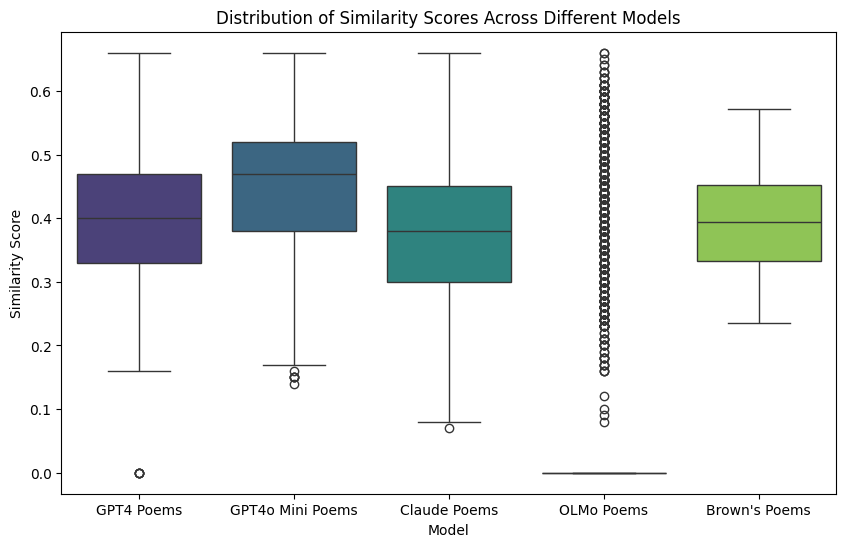

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_similarity_df, x='Model', y='Similarity Score', palette='viridis', hue='Model', legend=False)

# add labels and title
plt.title('Distribution of Similarity Scores Across Different Models')
plt.xlabel('Model')
plt.ylabel('Similarity Score')

plt.show()

In [22]:
# save dataframes with similarity as .csv files
gpt4_poems_df.to_csv('gpt4_poems_df_with_similarity.csv', index=False)
gpt4o_mini_poems_df.to_csv('gpt4o_mini_poems_df_with_similarity.csv', index=False)
claude_poems_df.to_csv('claude_poems_df_with_similarity.csv', index=False)
olmo_poems_df.to_csv('olmo_poems_df_with_similarity.csv', index=False)